<a href="https://colab.research.google.com/github/Barleysack/tensor101/blob/master/TRY1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import numpy as np


In [78]:
X, y = make_regression(n_samples=100, n_features=1, bias=10.0, noise=10.0, random_state=2)

print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

#############################


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(100, 1)
(100,)


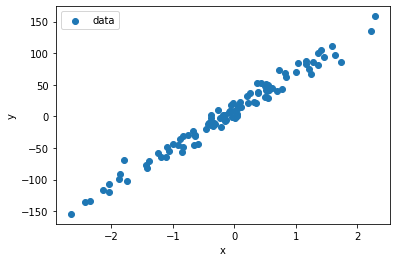

In [79]:
plt.scatter(X, y, label="data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [80]:
X_bias = np.insert(X, 0, 1, axis=1)
print(X_bias.shape)

(100, 2)


In [81]:
train_x = X_bias[:80]
test_x = X_bias[80:]

In [82]:
train_y = y[:80]
test_y = y[80:]
print(X_bias.shape)


(100, 2)


In [83]:
class SLRA():
    def __init__(self):
        self.w = np.random.rand(2,1) * 0.001
        
    def train(self, train_x, train_y):
        self.epochs = 100
        self.learning_rate = 0.05
        
        loss_mem = []
        
        #train_y 차원변환
        train_y = np.expand_dims(train_y, axis=1)
        
        for i in range(self.epochs):
            hypothesis = np.matmul(train_x, self.w)
            error = hypothesis - train_y
            loss = np.mean(error * error) / 2
            
            loss_mem.append(loss)
            
            #공식적용 및 차원유지 그리고 T를 통한 형상유지
            gradient = np.mean(error * train_x, axis=0, keepdims=True).T
            
            #GDA적용
            self.w -= self.learning_rate * gradient
            
        return loss_mem
            
    def test(self, target_x):
        res = np.matmul(target_x, self.w)
        
        return res
    
    def pred(self, test_x, test_y):
        test_y = np.expand_dims(test_y, axis=1)
        
        cal = np.matmul(test_x, self.w)
        error = cal - test_y
        mse = np.mean(error * error)
        rmse = np.sqrt(mse)
        
        return rmse

In [84]:
model = SLRA()
loss_mem = model.train(train_x, train_y)

x_epoch = list(range(len(loss_mem)))

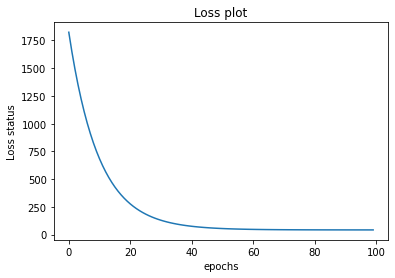

In [85]:

plt.plot(x_epoch, loss_mem)
plt.title('Loss plot')
plt.xlabel('epochs')
plt.ylabel('Loss status')

plt.show()

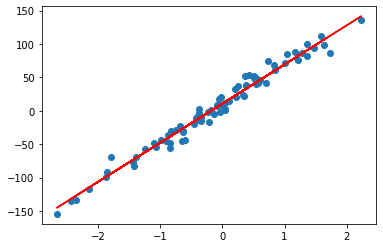

In [86]:
plt.scatter(train_x[:,1], train_y)
plt.plot(train_x[:,1], model.test(train_x), '-r')
plt.show()

In [87]:
print(model.pred(test_x, test_y))


10.10962176121681
